In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Data Load



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2021졸업프로젝트/코드/AXB_383_gene_default.csv')
label = data['label']
data = data.drop(['0_mirna'], axis=1)
data = data.drop(['1_gene'], axis=1)
data = data.drop(['label'], axis=1)

In [ ]:
x = data
y = list(label)

In [ ]:
data

,0_m,1_m,2_m,3_m,4_m,5_m,6_m,7_m,8_m,9_m,10_m,11_m,12_m,13_m,14_m,15_m,16_m,17_m,18_m,19_m,20_m,21_m,22_m,23_m,24_m,25_m,26_m,27_m,28_m,29_m,30_m,31_m,32_m,33_m,34_m,35_m,36_m,37_m,38_m,39_m,...,88_g,89_g,90_g,91_g,92_g,93_g,94_g,95_g,96_g,97_g,98_g,99_g,100_g,101_g,102_g,103_g,104_g,105_g,106_g,107_g,108_g,109_g,110_g,111_g,112_g,113_g,114_g,115_g,116_g,117_g,118_g,119_g,120_g,121_g,122_g,123_g,124_g,125_g,126_g,127_g
0,-0.042620,0.006116,0.010998,0.018766,-0.021424,-0.041661,0.014560,-0.006311,0.052901,0.000293,-0.013173,0.011151,-0.012622,-0.001012,-0.024035,0.002254,-0.000115,0.008135,-0.005783,-0.004835,-0.000450,-0.070949,-0.000592,0.005409,0.001579,-0.003539,-0.005268,-0.003139,-0.001259,-0.000908,0.007725,-0.014439,-0.004728,-0.020328,-0.002455,-0.001334,-0.000391,0.062508,-0.009167,-0.033829,...,0.002568,0.437557,0.279713,-0.016664,-0.022334,-0.356453,0.160296,0.304007,-0.011184,-0.479270,0.022114,-0.127133,0.057256,0.228210,-0.144044,-0.273887,0.166331,-0.005249,0.180729,-0.033637,-0.157188,-0.027008,-0.187705,0.060609,0.083117,0.025037,-0.027915,0.067408,1.194364,0.282027,0.262896,0.006273,0.090261,0.003542,0.394654,-0.126215,-0.468603,0.352978,-0.006112,0.010626
1,-0.042620,0.006116,0.010998,0.018766,-0.021424,-0.041661,0.014560,-0.006311,0.052901,0.000293,-0.013173,0.011151,-0.012622,-0.001012,-0.024035,0.002254,-0.000115,0.008135,-0.005783,-0.004835,-0.000450,-0.070949,-0.000592,0.005409,0.001579,-0.003539,-0.005268,-0.003139,-0.001259,-0.000908,0.007725,-0.014439,-0.004728,-0.020328,-0.002455,-0.001334,-0.000391,0.062508,-0.009167,-0.033829,...,-0.316032,-0.612589,0.000126,-0.077011,-0.041173,-0.148448,-0.362560,0.004391,0.388967,0.258962,-0.438519,-0.159160,0.026524,0.077942,-0.020452,0.163358,0.019172,-0.002244,0.064754,0.564444,0.023167,-0.044974,-0.131480,-0.059659,-0.134024,0.081941,-0.419666,-0.009789,-0.057981,0.111381,-0.013451,0.013196,-0.021203,0.157869,0.024474,-0.070136,0.207918,-0.246505,0.046724,-0.252666
2,-0.042620,0.006116,0.010998,0.018766,-0.021424,-0.041661,0.014560,-0.006311,0.052901,0.000293,-0.013173,0.011151,-0.012622,-0.001012,-0.024035,0.002254,-0.000115,0.008135,-0.005783,-0.004835,-0.000450,-0.070949,-0.000592,0.005409,0.001579,-0.003539,-0.005268,-0.003139,-0.001259,-0.000908,0.007725,-0.014439,-0.004728,-0.020328,-0.002455,-0.001334,-0.000391,0.062508,-0.009167,-0.033829,...,0.048304,-0.274590,-0.172164,-0.117322,-0.097356,0.244628,0.183078,0.059612,-0.007192,-0.698672,-0.071441,0.038050,0.565870,1.073013,-0.097440,0.168813,-0.219056,-0.277195,-0.074766,0.061206,0.052865,-0.008110,-0.450278,-0.038836,0.075185,0.052138,-0.085812,-0.046813,-0.731943,0.376827,-0.096090,0.076331,-0.020826,0.038490,-0.124383,0.339874,0.287630,0.158696,0.001835,-0.249706
3,-0.042620,0.006116,0.010998,0.018766,-0.021424,-0.041661,0.014560,-0.006311,0.052901,0.000293,-0.013173,0.011151,-0.012622,-0.001012,-0.024035,0.002254,-0.000115,0.008135,-0.005783,-0.004835,-0.000450,-0.070949,-0.000592,0.005409,0.001579,-0.003539,-0.005268,-0.003139,-0.001259,-0.000908,0.007725,-0.014439,-0.004728,-0.020328,-0.002455,-0.001334,-0.000391,0.062508,-0.009167,-0.033829,...,-0.187134,0.127299,-0.157490,-0.273768,0.071605,0.012928,0.296397,-0.355788,-0.176707,0.461204,0.000048,-0.036206,0.103438,0.002134,0.087471,-0.195310,-0.179538,-0.022793,0.126567,0.000783,-0.124518,0.224790,-0.200267,0.078431,-0.025943,-0.072033,-0.030171,-0.014575,-0.697111,0.654347,-0.371766,-0.002610,0.161371,0.078100,0.292386,-0.103527,-0.314781,0.384483,-0.035062,0.022546
4,-0.042620,0.006116,0.010998,0.018766,-0.021424,-0.041661,0.014560,-0.006311,0.052901,0.000293,-0.013173,0.011151,-0.012622,-0.001012,-0.024035,0.002254,-0.000115,0.008135,-0.005783,-0.004835,-0.000450,-0.070949,-0.000592,0.005409,0.001579,-0.003539,-0.005268,-0.003139,-0.001259,-0.000908,0.007725,-0.014439,-0.004728,-0.020328,-0.002455,-0.001334,-0.000391,0.062508,-0.009167,-0.033829,...,-0.002863,0.039329,0.141671,-0.092984,-0.004586,-0.048511,0.777676,0.098446,0.027644,-0.083

train, test data split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

- Autoencoder 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# from tensorflow.keras import Model ,models, layers, optimizers, utils
# model = models.Sequential()
# model.add(layers.LSTM(100, activation='relu', input_shape=(n_in, 1)))
# model.add(layers.RepeatVector(n_in))
# model.add(layers.LSTM(100, activation='relu', return_sequences=True))
# model.add(layers.TimeDistributed(layers.Dense(1)))
# model.compile(optimizer='adam', loss='mse')


In [ ]:
inputs = keras.Input(shape=(256,))
x = layers.Flatten()(inputs)
x = layers.Dense(128)(x)
x = layers.Dense(64)(x)
x = layers.Dense(128)(x)
x = layers.Dense(256)(x)
x = layers.Reshape((256,))(x)
outputs = x

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256)]             0         
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 reshape (Reshape)           (None, 256)               0     

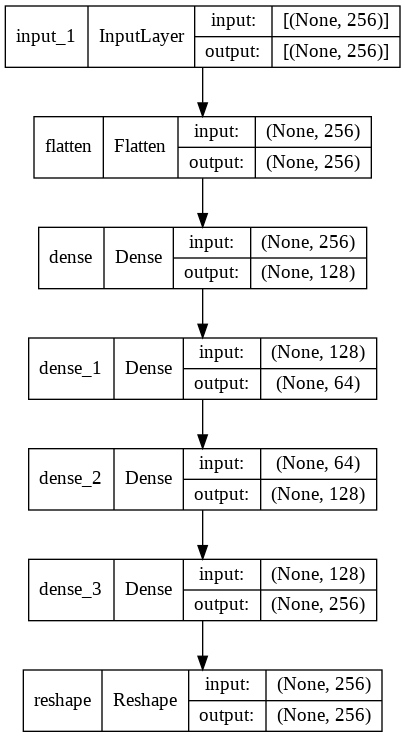

In [ ]:
model=keras.Model(inputs, outputs)
model.summary()
tf.keras.utils.plot_model(model, 'model.png',show_shapes=True)

In [ ]:
x_train.shape

(18648, 256)

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
fit = model.fit(x_train, x_train, epochs=200, validation_data=(x_test,x_test))
eval = model.evaluate(x_test,  x_test, verbose=2)

Epoch 1/200
583/583 [==============================] - 3s 4ms/step - loss: 0.0110 - mae: 0.0622 - val_loss: 0.0038 - val_mae: 0.0393
Epoch 2/200
583/583 [==============================] - 2s 3ms/step - loss: 0.0033 - mae: 0.0356 - val_loss: 0.0031 - val_mae: 0.0344
Epoch 3/200
583/583 [==============================] - 2s 4ms/step - loss: 0.0030 - mae: 0.0339 - val_loss: 0.0030 - val_mae: 0.0338
Epoch 4/200
583/583 [==============================] - 2s 3ms/step - loss: 0.0030 - mae: 0.0337 - val_loss: 0.0030 - val_mae: 0.0338
Epoch 5/200
583/583 [==============================] - 2s 4ms/step - loss: 0.0030 - mae: 0.0336 - val_loss: 0.0030 - val_mae: 0.0337
Epoch 6/200
583/583 [==============================] - 2s 4ms/step - loss: 0.0029 - mae: 0.0336 - val_loss: 0.0030 - val_mae: 0.0335
Epoch 7/200
583/583 [==============================] - 2s 4ms/step - loss: 0.0030 - mae: 0.0336 - val_loss: 0.0030 - val_mae: 0.0336
Epoch 8/200
583/583 [==============================] - 2s 4ms/step - 

In [ ]:
eval

[0.0029281391762197018, 0.033022768795490265]

In [ ]:
print(fit.history)

{'loss': [0.010975533165037632, 0.00325700337998569, 0.0030051872599869967, 0.002968659158796072, 0.0029571829363703728, 0.0029465798288583755, 0.002953144023194909, 0.0029436377808451653, 0.0029346798546612263, 0.002938424237072468, 0.0029298451263457537, 0.0029239708092063665, 0.0029218571726232767, 0.002922114683315158, 0.002919166348874569, 0.002913815900683403, 0.002918887184932828, 0.0029149570036679506, 0.0029096913058310747, 0.0029142354615032673, 0.0029045315459370613, 0.002920612460002303, 0.0029006698168814182, 0.002907796064391732, 0.002909352071583271, 0.002904269378632307, 0.002903953194618225, 0.0029126196168363094, 0.002893745666369796, 0.002900240942835808, 0.0029053606558591127, 0.00289968797005713, 0.002904654946178198, 0.0028963692020624876, 0.002898486563935876, 0.002896461170166731, 0.002898263745009899, 0.0028883174527436495, 0.0029030307196080685, 0.00290122302249074, 0.0028905412182211876, 0.0028920357581228018, 0.0028937829192727804, 0.0028879393357783556, 0.0

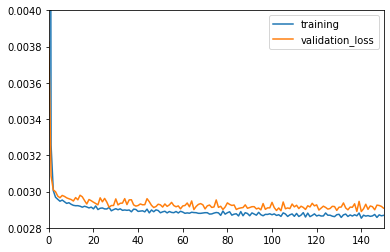

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit.history['loss'], label='training')
plt.plot(fit.history['val_loss'], label='validation_loss')
plt.legend(loc="upper right")
plt.xlim(0,150)
plt.ylim(0.0028,0.004)
plt.show()